Понижение размерности и визуализация данных

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('SleepStudyData.csv')
data['Enough'] = data['Enough'].map({'Yes': 1, 'No': 0})
data['PhoneReach'] = data['PhoneReach'].map({'Yes': 1, 'No': 0})
data['PhoneTime'] = data['PhoneTime'].map({'Yes': 1, 'No': 0})
data['Breakfast'] = data['Breakfast'].map({'Yes': 1, 'No': 0})
data = data.fillna(data.mean())
features = list(data.columns[1:6])
X = data[features]
data.head()

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
0,1,8,1,1,3,1
1,0,6,1,1,3,0
2,1,6,1,1,2,1
3,0,7,1,1,4,0
4,0,7,1,1,2,1


PCA

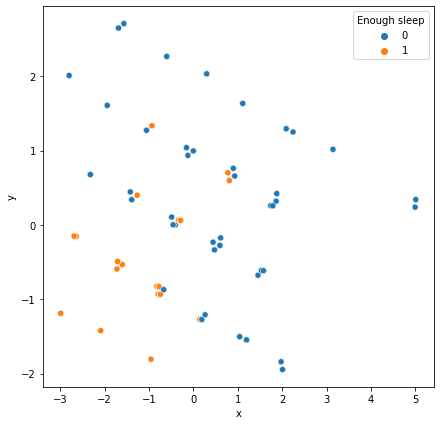

In [3]:
decomposition= PCA(n_components=2).fit_transform(X.values)

result = data.select_dtypes(include='int64').copy()
result['Enough sleep'] = data['Enough']
result['x'] = decomposition[:,0]
result['y'] = decomposition[:,1]

plt.figure(figsize=(7, 7))
sns.scatterplot(
    x="x", y="y",
    hue="Enough sleep",
    data=result,
    legend="full")

TSNE

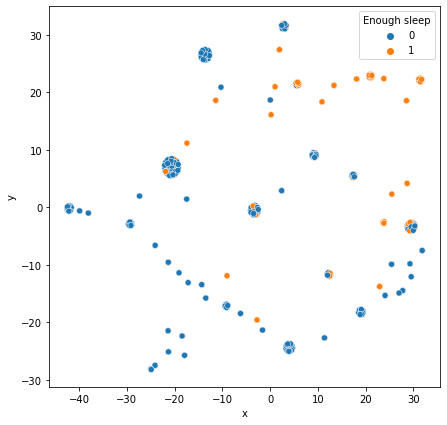

In [4]:
manifold = TSNE(n_components=2).fit_transform(X.values)

result = data.select_dtypes(include='int64').copy()
result['Enough sleep'] = data['Enough']
result['x'] = manifold[:,0]
result['y'] = manifold[:,1]

plt.figure(figsize=(7, 7))
sns.scatterplot(
    x="x", y="y",
    hue="Enough sleep",
    data=result,
    legend="full")

Кластерный анализ

Квантование изображения

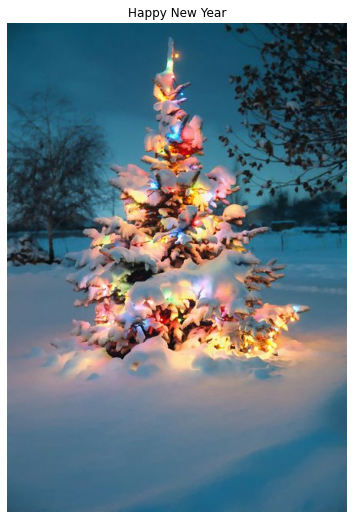

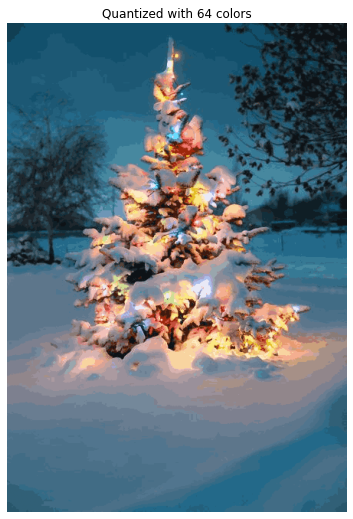

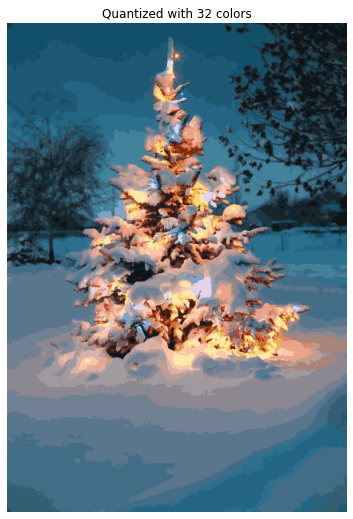

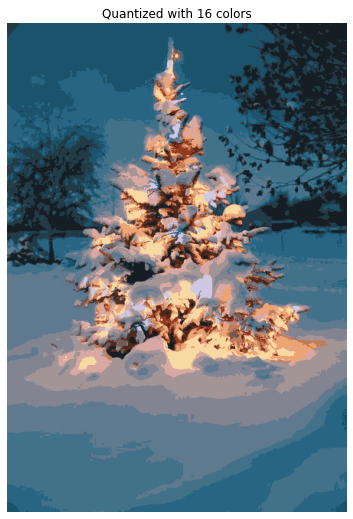

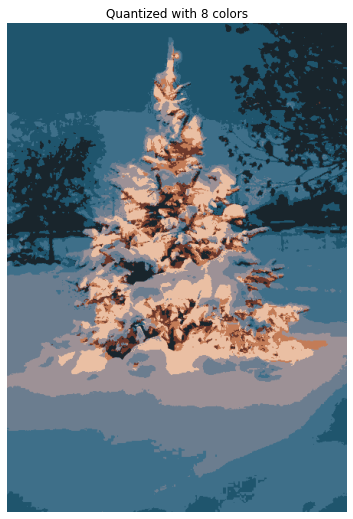

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans

def recreate_image(codebook, labels, w, h):
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

N = [64, 32, 16, 8]
sample = 0.01

img = Image.open('happy_new_year.jpg')
img = np.array(img, dtype=np.float64) / 255

w, h, ch = img.shape
img_array = np.reshape(img, (w * h, ch))

results = []
for n in N:
    img_sample = img_array[np.random.choice(w * h, int(w * h * sample)), :]
    kmeans = KMeans(n_clusters=n).fit(img_sample)
    results.append(kmeans)
    
plt.figure(figsize=(16, 9))
plt.axis('off')
plt.title('Happy New Year')
plt.imshow(img) 

for result in results:
    labels = result.predict(img_array)
    plt.figure(figsize=(16,9))
    plt.axis('off')
    plt.title(f'Quantized with {result.get_params().get("n_clusters")} colors')
    plt.imshow(recreate_image(result.cluster_centers_, labels, w, h))

Силуэтные графики

For n_clusters = 4 The average silhouette_score is : 0.5830422035169395
For n_clusters = 5 The average silhouette_score is : 0.5740089825824137
For n_clusters = 6 The average silhouette_score is : 0.5206045531413668


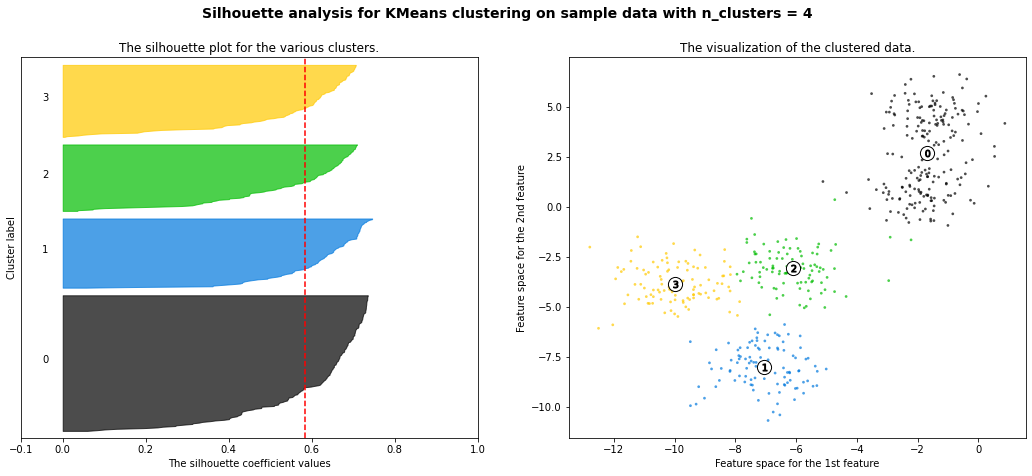

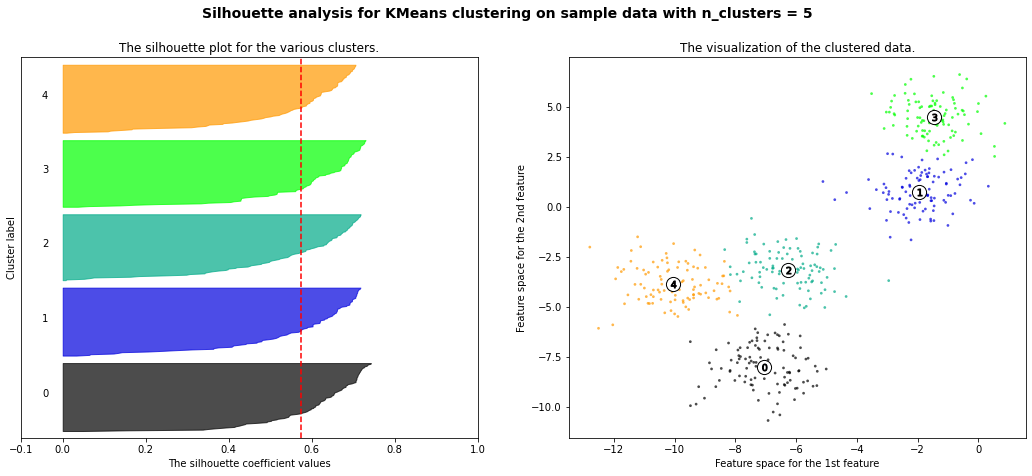

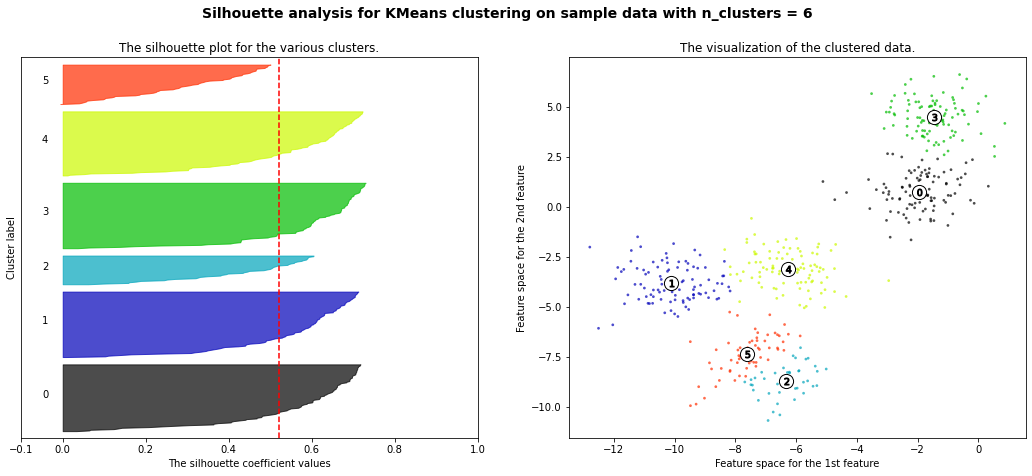

In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

На лівих графіках показані розмір кластеру (ширина полоси) та на скільки точки кластеру знаходяться ближче до інших точок цього ж кластеру, ніж до точок з інших кластерів. При розбитті на 4 та 5 кластерів усі полоси мають однакову довжину, що означае, що дані розбиття є хорошими, проте при розбитті на 4 кластери один з них удвоє ширший за інші. Така ситуація може бути і в реальній задачі, тому це не можна вважати ознакою того, що дане розбиття неправильне. А от розбиття на 6 видає кластери, у яких значення коефіцієнту silhouette менше за середнє значення по усім кластерам, що є ознакою того, що таке розбиття неправильне.

EM

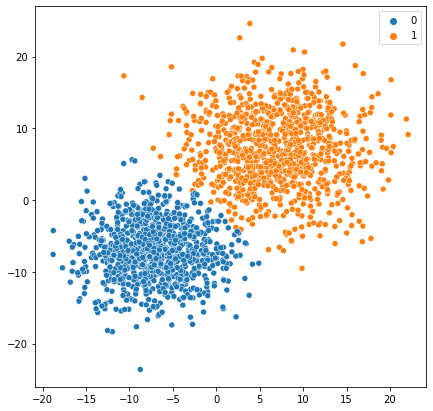

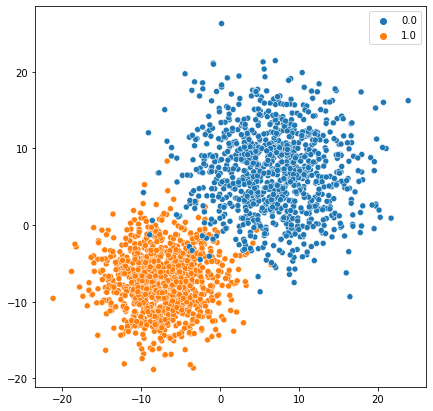

In [7]:
from sklearn.mixture import GaussianMixture
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mean1 = [-7, -7]
cov1 = [[17, 0], [0, 17]]
mean2 = [7, 7]
cov2 = [[27, 0], [0, 27]]
x1 = np.random.default_rng().multivariate_normal(mean1, cov1, 1000)
x2 = np.random.default_rng().multivariate_normal(mean2, cov2, 1000)
data = np.vstack([x1,x2])
mix = GaussianMixture(n_components=2, covariance_type='diag')
labels = mix.fit_predict(data)
plt.figure(figsize=(7, 7))
sns.scatterplot(x=data[:,0], y=data[:,1], hue=labels)
x1 = np.random.default_rng().multivariate_normal(mix.means_[0], np.diag(mix.covariances_[0]), 1000)
x2 = np.random.default_rng().multivariate_normal(mix.means_[1], np.diag(mix.covariances_[1]), 1000)
data = np.vstack([x1,x2])
plt.figure(figsize=(7, 7))
sns.scatterplot(x=data[:,0], y=data[:,1], hue=np.hstack([np.ones((1000)),np.zeros((1000))]))

Обработка текстовых данных

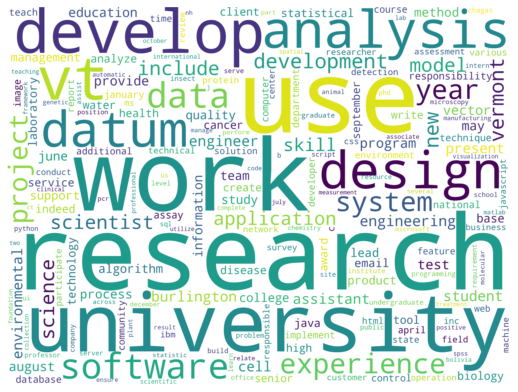

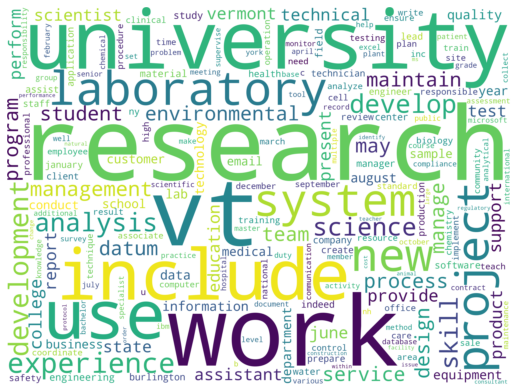

In [10]:
import string
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

pd.set_option('max_colwidth', 400)
corpus = pd.read_csv('Sheet.csv')
corpus = corpus.iloc[0:None, 1:3]

def remove(text):
    t = re.sub(r"(\d+\.\d+)", "", text)
    t = re.sub(r"($|€|¥|₹|£)", "", t)
    t = re.sub(r"(%)", "", t)
    t = re.sub(r"\d+", "", t)
    t = re.sub(r"\n", "", t)
    return t

def punctuation(text):
    table = str.maketrans("", "", string.punctuation)
    t = text.translate(table)
    return t

def lemmatizer(text):
    sent = []
    nlp = spacy.load('en')
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

def stop_words(text):
    list_ = []
    stop_words = stopwords.words('english')
    words_list = text.split()
    for word in words_list:
        if word not in stop_words:
            list_.append(word)
    return ' '.join(list_)

corpus['resume_text'] = corpus['resume_text'].str.lower()
corpus['resume_text'] = corpus['resume_text'].apply(remove)
corpus['resume_text'] = corpus['resume_text'].apply(punctuation)
corpus['resume_text'] = corpus['resume_text'].apply(stop_words)
corpus['resume_text'] = corpus['resume_text'].apply(lemmatizer)

# Візуалізація
def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 2880,
        height = 2160,
        collocations=False,
        background_color = 'white').generate(str(text))
    
    plt.figure(figsize=(7, 7))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

generate_word_cloud(corpus[corpus['class']=='flagged'].resume_text.values)
generate_word_cloud(corpus[corpus['class']=='not_flagged'].resume_text.values)

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import ComplementNB

# Класифікація
X = TfidfVectorizer(max_features=777).fit_transform(corpus['resume_text'])
y = corpus['class']
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.15, random_state=2)

GaussianModel = GaussianNB(var_smoothing=0.0001).fit(X_train, y_train)
prediction = GaussianModel.predict(X_test)
print(f"Точність Gaussian Naive Bayes: {round(accuracy_score(y_test, prediction)*100, 2)}%")

CategoricalModel = CategoricalNB(alpha=0.1).fit(X_train, y_train)
prediction = CategoricalModel.predict(X_test)
print(f"Точність Categorical Naive Bayes: {round(accuracy_score(y_test, prediction)*100, 2)}%")

ComplementModel = ComplementNB(alpha=1.0).fit(X_train, y_train)
prediction = ComplementModel.predict(X_test)
print(f"Точність Complement Naive Bayes: {round(accuracy_score(y_test, prediction)*100, 2)}%")

Точність Gaussian Naive Bayes: 94.74%
Точність Categorical Naive Bayes: 94.74%
Точність Complement Naive Bayes: 84.21%
